In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
DATA_SHEET_NAME = 'Raw Data'
df = pd.read_excel("raw.xlsx", sheet_name=DATA_SHEET_NAME)
print(df.shape)
df.head()

(38610, 18)


,patientid,apptdate,apptday,appttype,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patient.age,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn
0,299758,10/22/2019,Tuesday,FOLLOW UP 15,1,1,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y
1,299758,11/19/2019,Tuesday,FOLLOW UP 15,1,0,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y
2,299770,10/30/2019,Wednesday,PT INITIAL EVAL,0,0,0,Black,Not Hispanic or Latino,English,81,M,SINGLE,N,N,N,N,Y
3,299770,11/08/2019,Friday,PT FOLLOW UP 30,1,1,0,Black,Not Hispanic or Latino,English,81,M,SINGLE,N,N,N,N,Y
4,299783,10/11/2019,Friday,FOLLOW UP 30,1,0,0,Black,Not Hispanic or Latino,English,49,F,SINGLE,P,P,P,Y,N


In [6]:
df.columns

Index(['patientid', 'apptdate', 'apptday', 'appttype', 'scheduled.slots',
       'cancelled.slots', 'patient.noshow', 'race', 'ethnicity',
       'patient.lang', 'patient.age', 'patientsex', 'patient.marital.status',
       'homelessstatus', 'pblchouspat', 'vetstatus', 'ptnt.cnsnt.t.cll.ysn',
       'ptnt.cnsnt.t.txt.ysn'],
      dtype='object')

In [7]:
df.drop(columns=['patientid'] , inplace=True)

In [8]:
df.head()

,apptdate,apptday,appttype,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patient.age,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn
0,10/22/2019,Tuesday,FOLLOW UP 15,1,1,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y
1,11/19/2019,Tuesday,FOLLOW UP 15,1,0,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y
2,10/30/2019,Wednesday,PT INITIAL EVAL,0,0,0,Black,Not Hispanic or Latino,English,81,M,SINGLE,N,N,N,N,Y
3,11/08/2019,Friday,PT FOLLOW UP 30,1,1,0,Black,Not Hispanic or Latino,English,81,M,SINGLE,N,N,N,N,Y
4,10/11/2019,Friday,FOLLOW UP 30,1,0,0,Black,Not Hispanic or Latino,English,49,F,SINGLE,P,P,P,Y,N


In [9]:
df.shape

(38610, 17)

In [10]:
df.isnull().sum()

apptdate                    0
apptday                     0
appttype                    0
scheduled.slots             0
cancelled.slots             0
patient.noshow              0
race                      424
ethnicity                 326
patient.lang              309
patient.age                 0
patientsex                  0
patient.marital.status    304
homelessstatus            727
pblchouspat               731
vetstatus                 728
ptnt.cnsnt.t.cll.ysn      380
ptnt.cnsnt.t.txt.ysn      507
dtype: int64

In [11]:
# Fill missing values for categorical columns with 'Unknown'
df['race'].fillna('UNKNOWN', inplace=True)
df['ethnicity'].fillna('UNKNOWN', inplace=True)
df['patient.lang'].fillna('UNKNOWN', inplace=True)
df['patient.marital.status'].fillna('UNKNOWN', inplace=True)
df['homelessstatus'].fillna('UNKNOWN', inplace=True)
df['pblchouspat'].fillna('UNKNOWN', inplace=True)
df['vetstatus'].fillna('UNKNOWN', inplace=True)
df['ptnt.cnsnt.t.cll.ysn'].fillna('N', inplace=True)
df['ptnt.cnsnt.t.txt.ysn'].fillna('N', inplace=True)

In [12]:
df.duplicated().sum()

np.int64(217)

In [13]:
# Identify fully duplicated rows
duplicate_rows = df[df.duplicated(keep=False)]  # 'keep=False' marks all occurrences as duplicates

# Display the first few duplicate rows
print(duplicate_rows)


         apptdate    apptday                  appttype  scheduled.slots  \
281    10/10/2019  Thursday                   LAB WORK                1   
283    10/10/2019  Thursday                   LAB WORK                1   
331    10/15/2019  Tuesday                    LAB WORK                1   
522    11/04/2019  Monday                 FOLLOW UP 10                1   
550    11/11/2019  Monday                 FOLLOW UP 20                1   
...           ...        ...                       ...              ...   
38098  11/22/2019  Friday               NEW PATIENT 30                1   
38332  11/11/2019  Monday     Mobile Health Fair/Event                1   
38346  11/11/2019  Monday     Mobile Health Fair/Event                1   
38429  11/18/2019  Monday               NEW PATIENT 30                1   
38531  11/22/2019  Friday               NEW PATIENT 30                1   

       cancelled.slots  patient.noshow                       race  \
281                  1        

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(38393, 17)

In [16]:
df.columns

Index(['apptdate', 'apptday', 'appttype', 'scheduled.slots', 'cancelled.slots',
       'patient.noshow', 'race', 'ethnicity', 'patient.lang', 'patient.age',
       'patientsex', 'patient.marital.status', 'homelessstatus', 'pblchouspat',
       'vetstatus', 'ptnt.cnsnt.t.cll.ysn', 'ptnt.cnsnt.t.txt.ysn'],
      dtype='object')

In [17]:
df["patient.noshow"].value_counts()

patient.noshow
0    29975
1     8374
2       44
Name: count, dtype: int64

In [18]:
df['patient.noshow'] = df['patient.noshow'].replace(2, 1)

In [19]:
df.dtypes

apptdate                  object
apptday                   object
appttype                  object
scheduled.slots            int64
cancelled.slots            int64
patient.noshow             int64
race                      object
ethnicity                 object
patient.lang              object
patient.age                int64
patientsex                object
patient.marital.status    object
homelessstatus            object
pblchouspat               object
vetstatus                 object
ptnt.cnsnt.t.cll.ysn      object
ptnt.cnsnt.t.txt.ysn      object
dtype: object

###### Our data is imbalanced

In [20]:
cat_cols = ['apptdate','apptday',
       'appttype','race', 'ethnicity','patient.lang','homelessstatus','patient.marital.status',
	'patientsex','pblchouspat','vetstatus','ptnt.cnsnt.t.cll.ysn','ptnt.cnsnt.t.txt.ysn']

num_cols = ['scheduled.slots', 'cancelled.slots', 'patient.noshow',
       'patient.age']

### DATA ANALYSIS

In [21]:
data = df.copy()

In [22]:
data.head()

,apptdate,apptday,appttype,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patient.age,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn
0,10/22/2019,Tuesday,FOLLOW UP 15,1,1,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y
1,11/19/2019,Tuesday,FOLLOW UP 15,1,0,0,Patient Declined,Hispanic or Latino/Spanish,English,54,F,SINGLE,N,N,N,Y,Y
2,10/30/2019,Wednesday,PT INITIAL EVAL,0,0,0,Black,Not Hispanic or Latino,English,81,M,SINGLE,N,N,N,N,Y
3,11/08/2019,Friday,PT FOLLOW UP 30,1,1,0,Black,Not Hispanic or Latino,English,81,M,SINGLE,N,N,N,N,Y
4,10/11/2019,Friday,FOLLOW UP 30,1,0,0,Black,Not Hispanic or Latino,English,49,F,SINGLE,P,P,P,Y,N


##### UNIVARIATE ANALYSIS

In [23]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

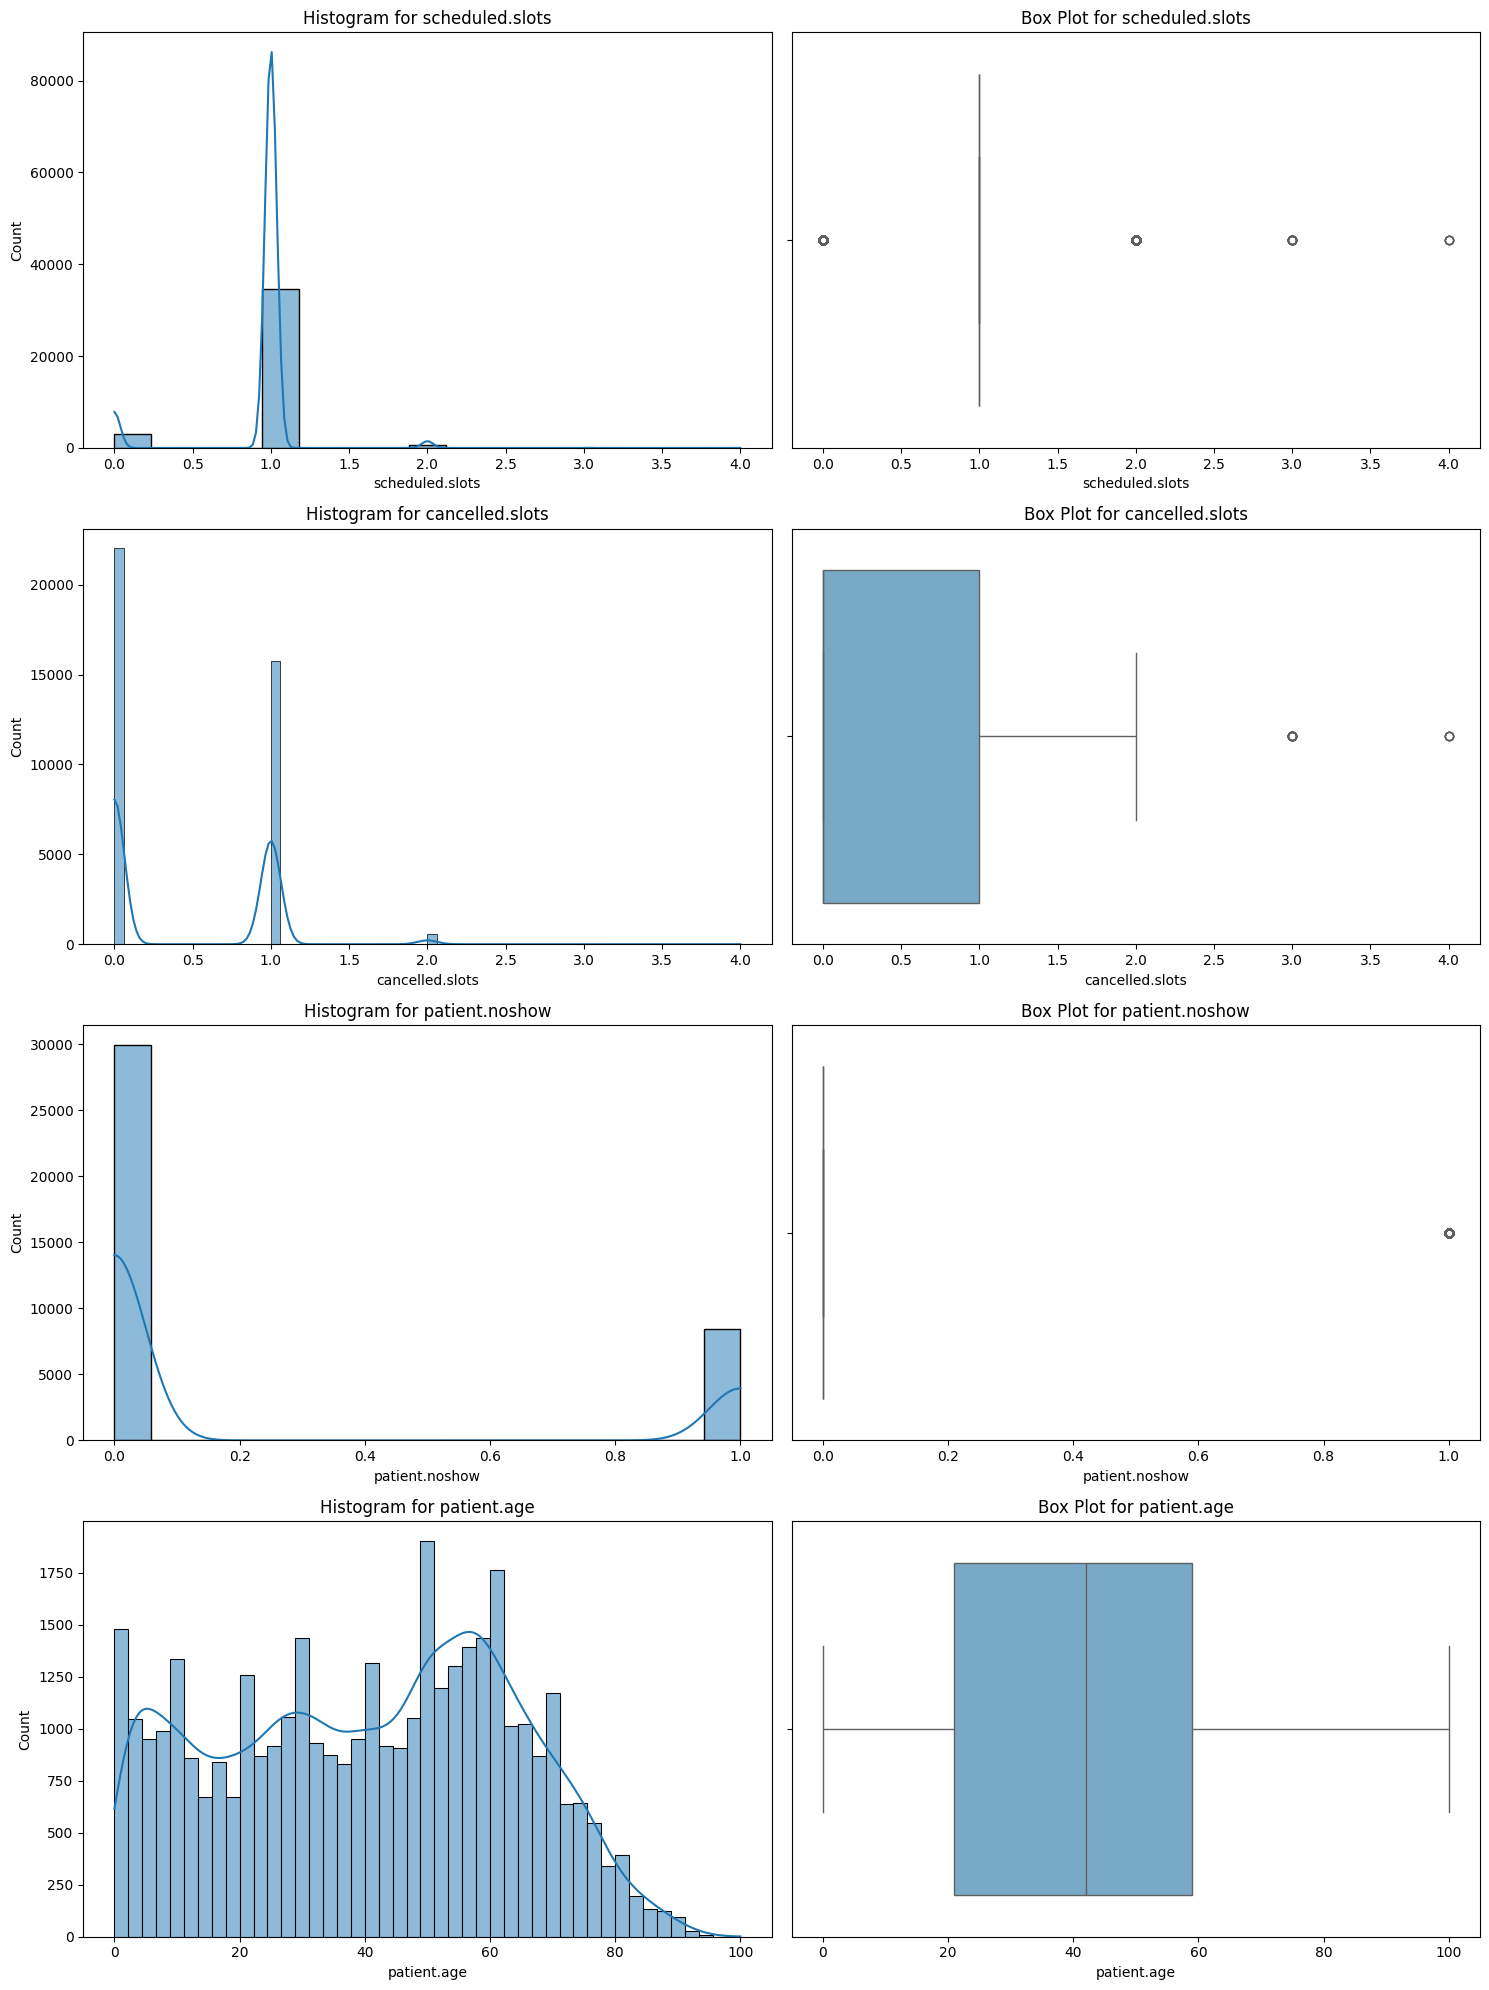

In [24]:
num_plot_dist(data , num_cols)

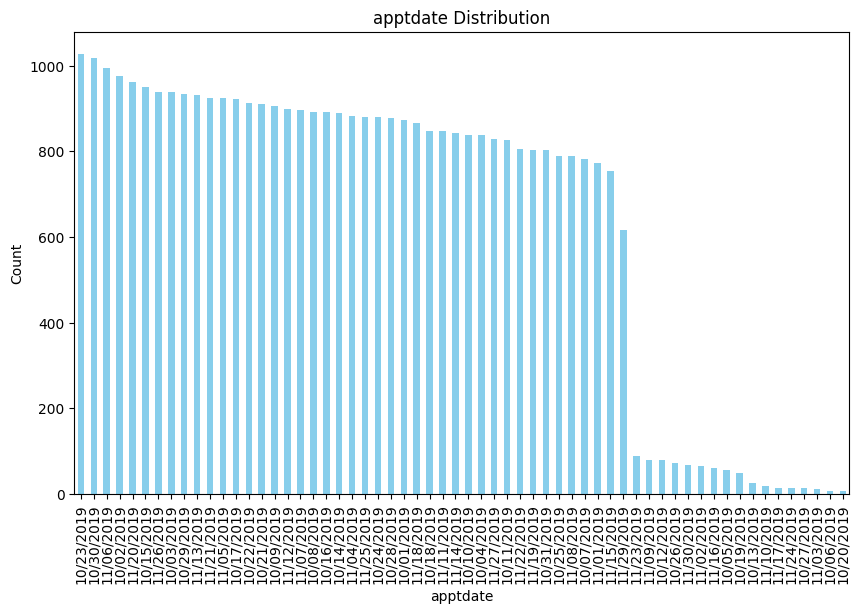

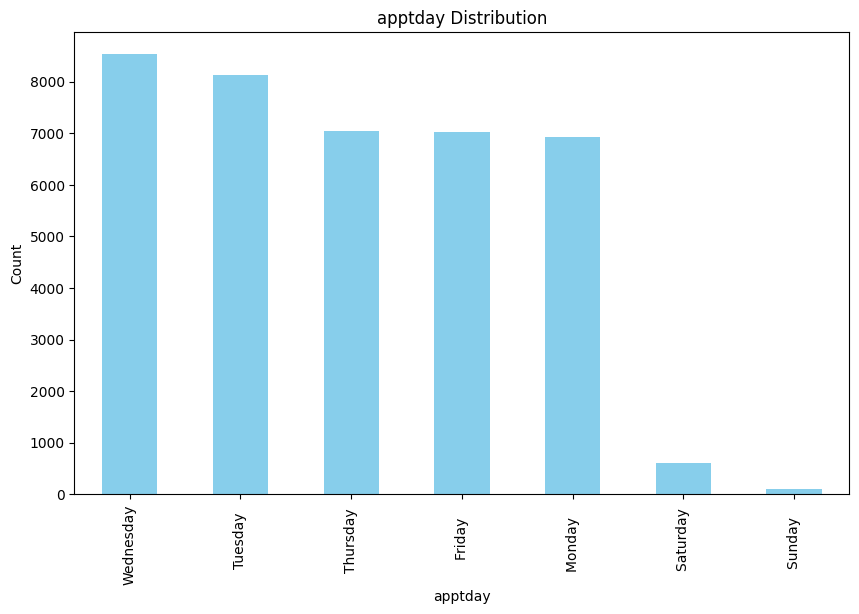

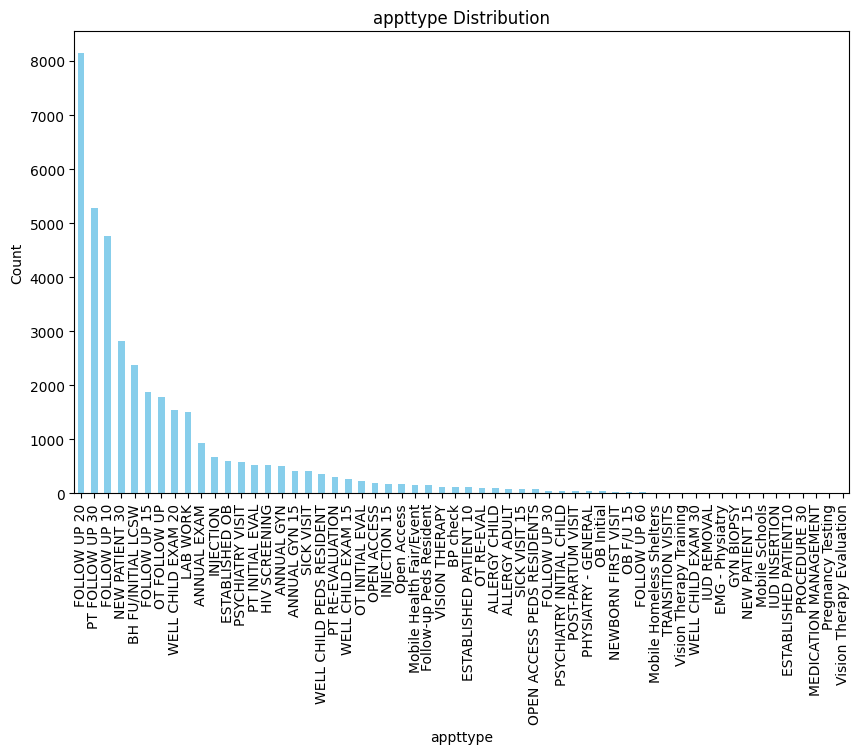

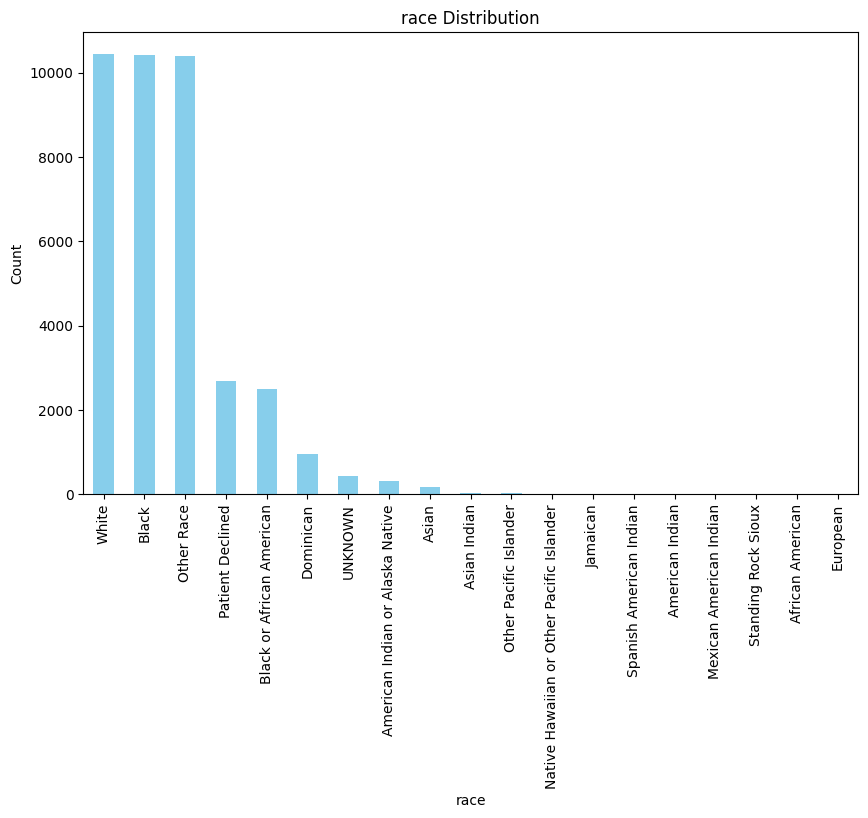

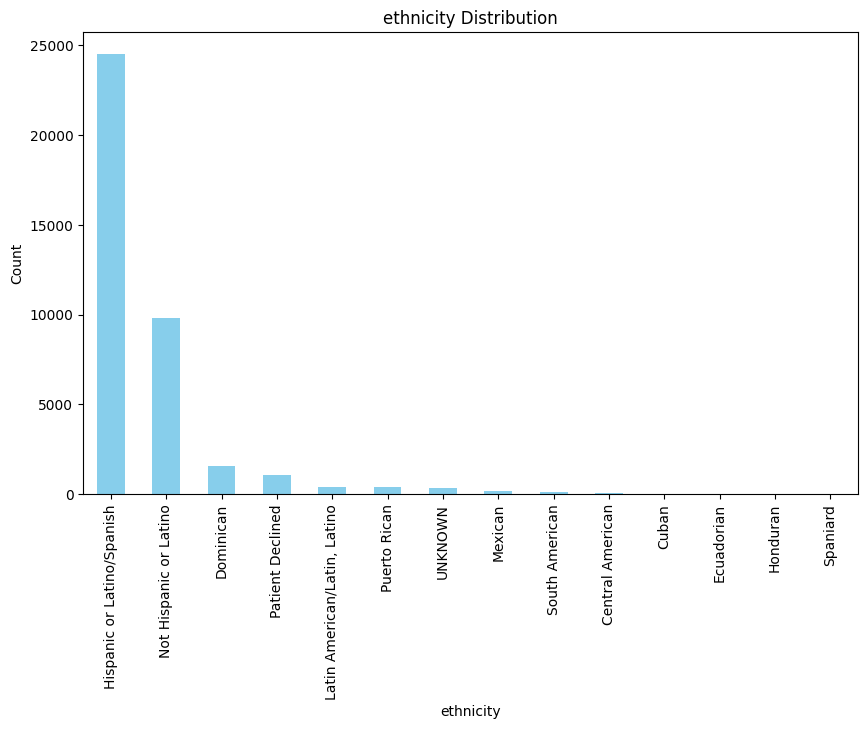

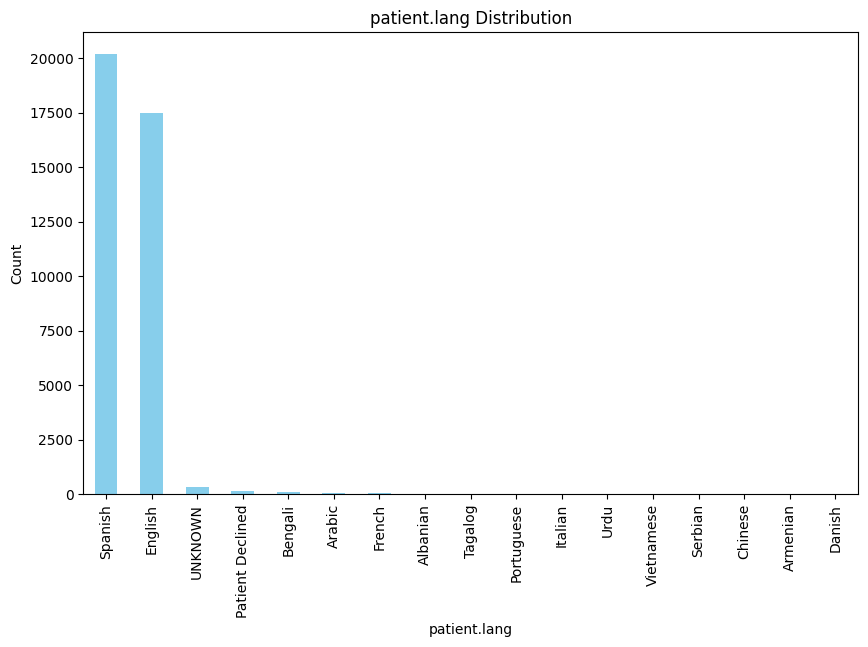

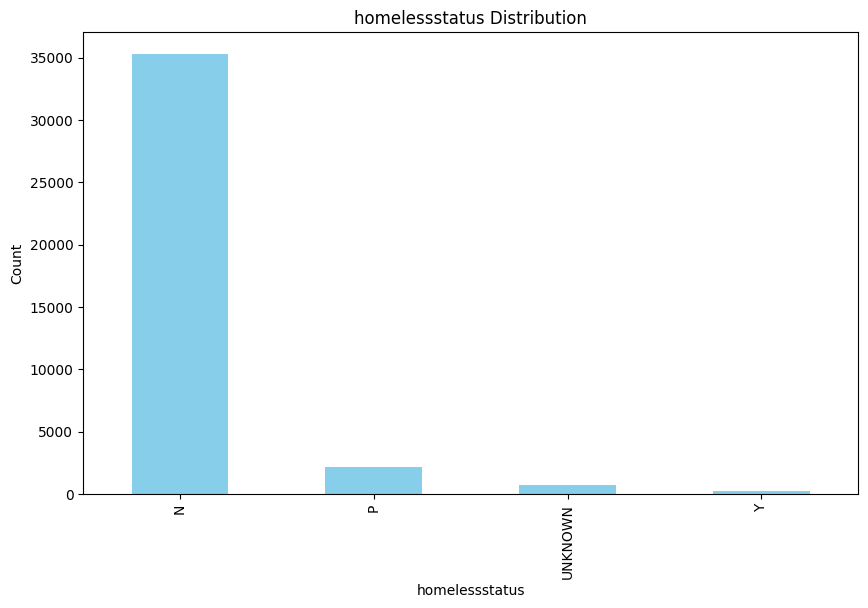

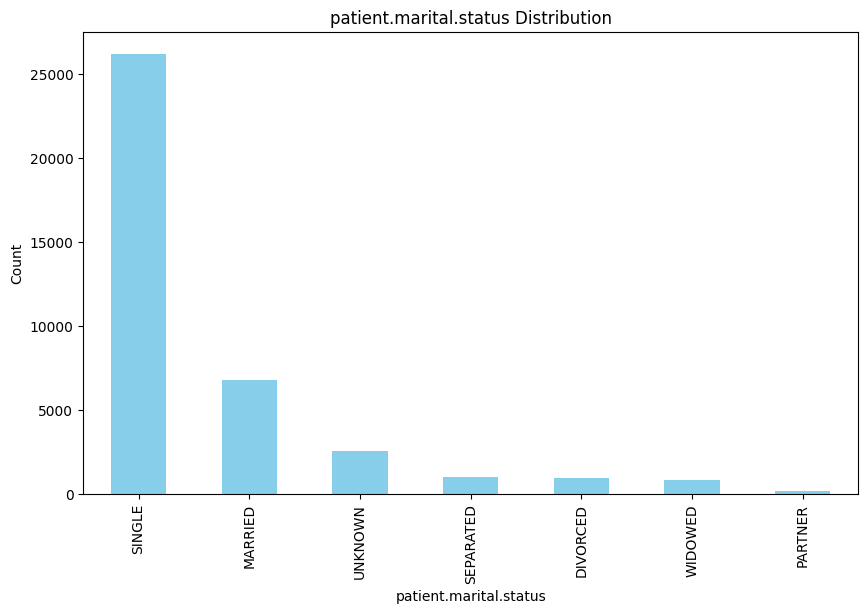

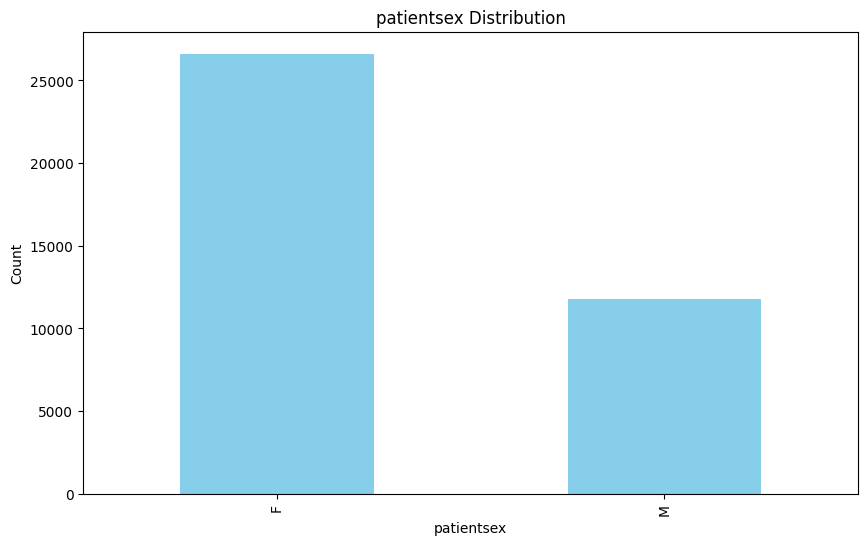

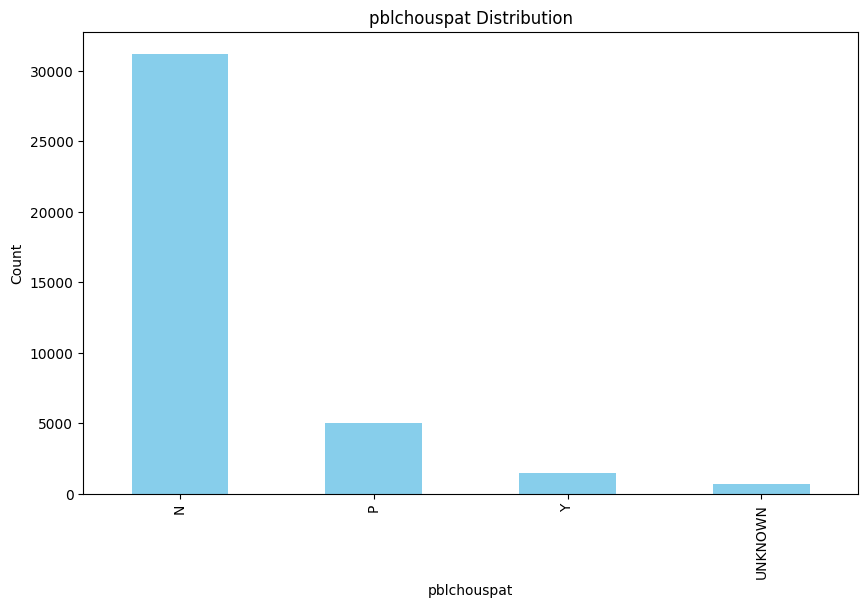

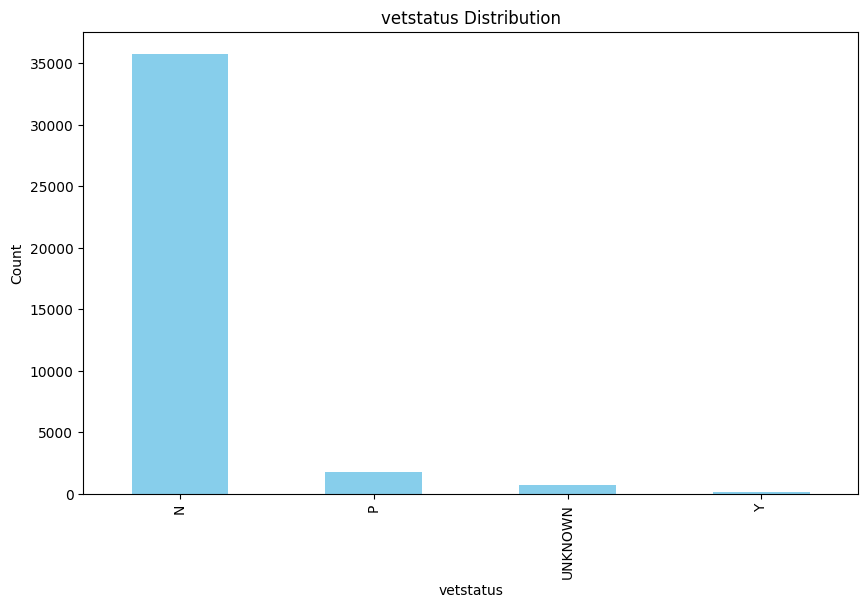

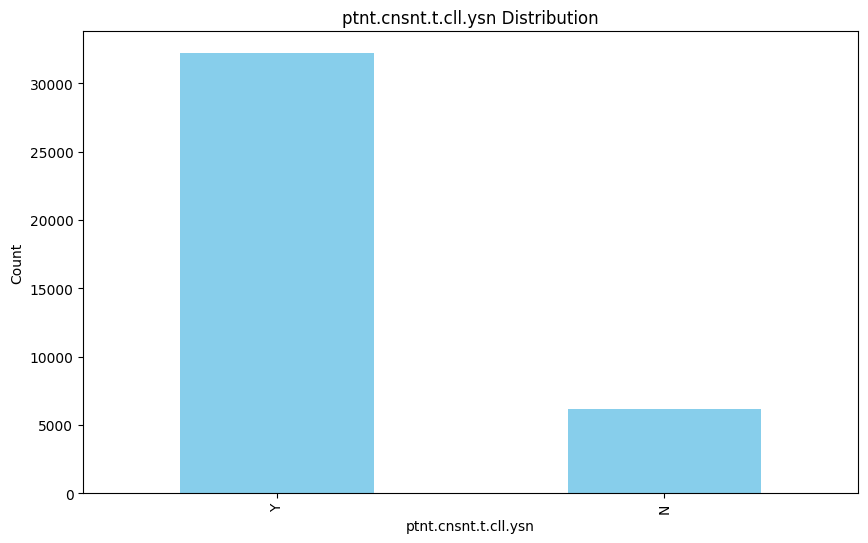

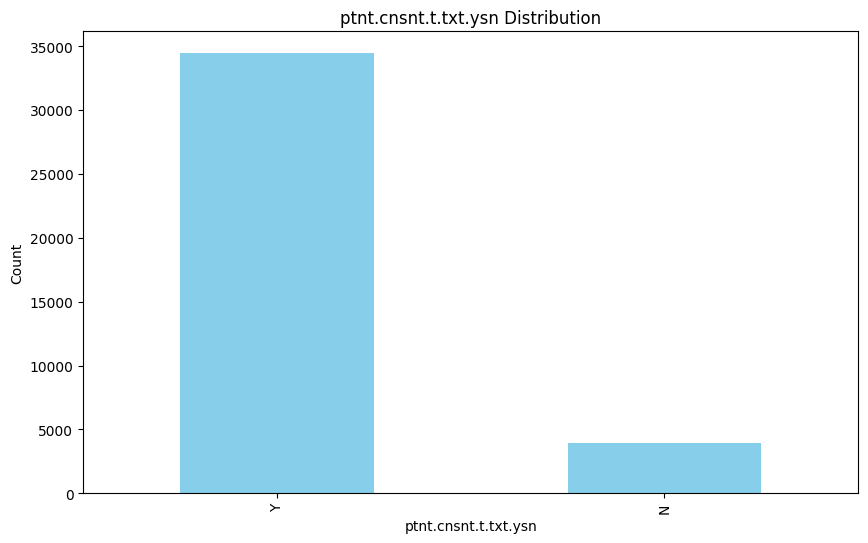

In [25]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### Bivaraite Analysis

In [26]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

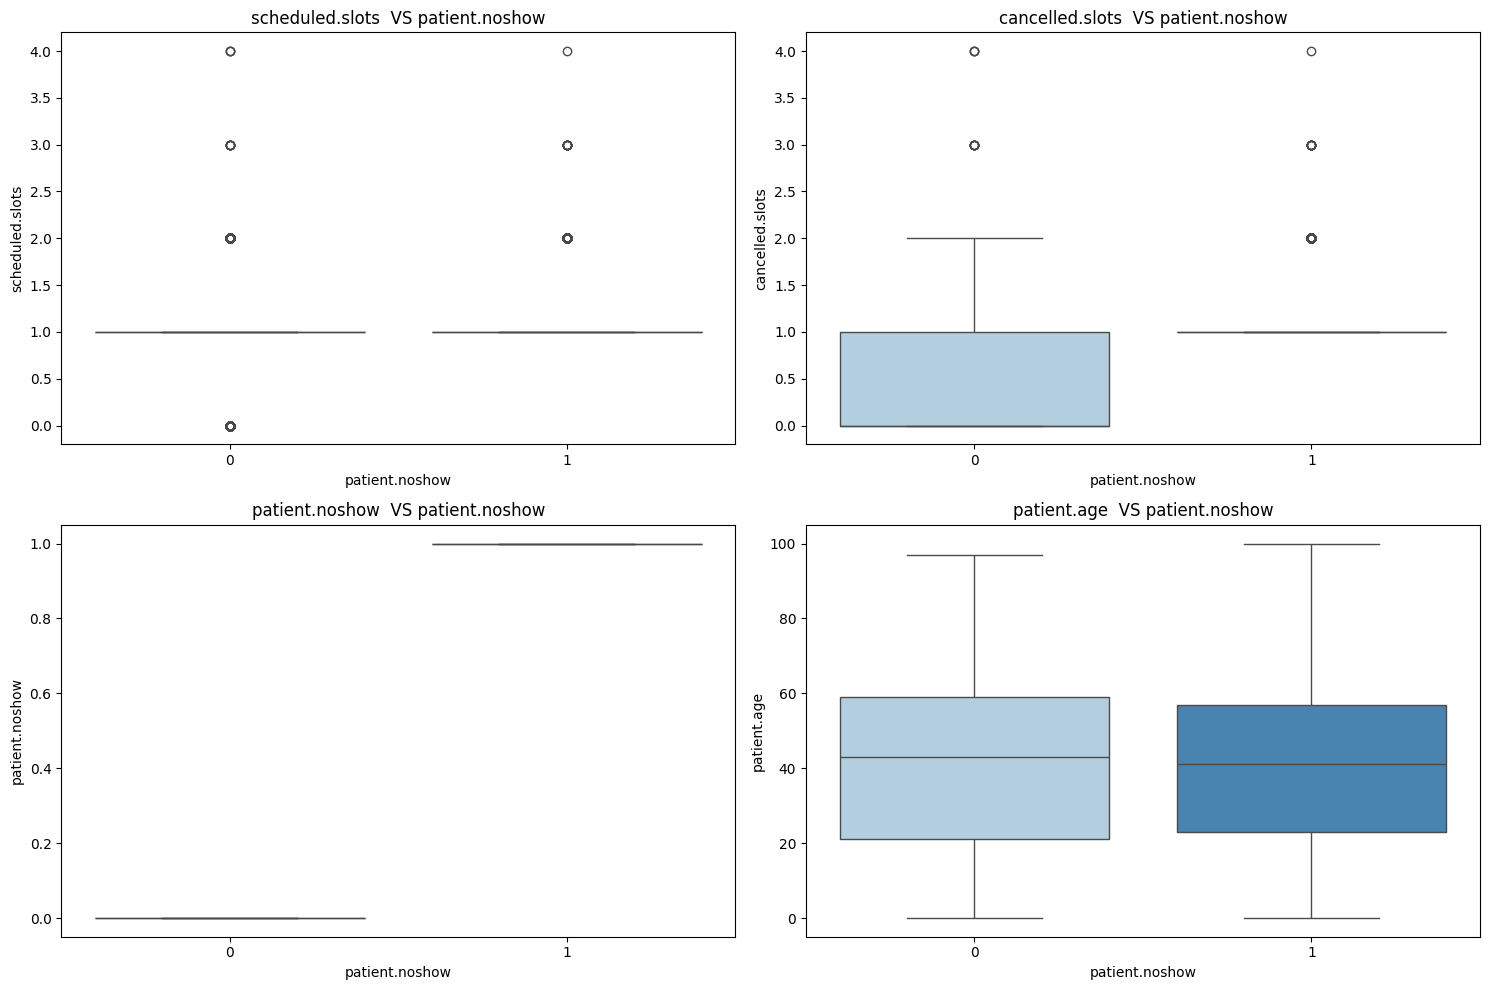

In [27]:
plot_bivariate_num(data , 'patient.noshow' , num_cols)

In [28]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']

# Add the age group column
df['age_group'] = pd.cut(df['patient.age'], bins=bins, labels=labels, right=False)

# Drop the original 'patient.age' column
df = df.drop(columns=['patient.age'])

# Display the first few rows to check
df.head(2)

,apptdate,apptday,appttype,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn,age_group
0,10/22/2019,Tuesday,FOLLOW UP 15,1,1,0,Patient Declined,Hispanic or Latino/Spanish,English,F,SINGLE,N,N,N,Y,Y,51-60
1,11/19/2019,Tuesday,FOLLOW UP 15,1,0,0,Patient Declined,Hispanic or Latino/Spanish,English,F,SINGLE,N,N,N,Y,Y,51-60


In [29]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

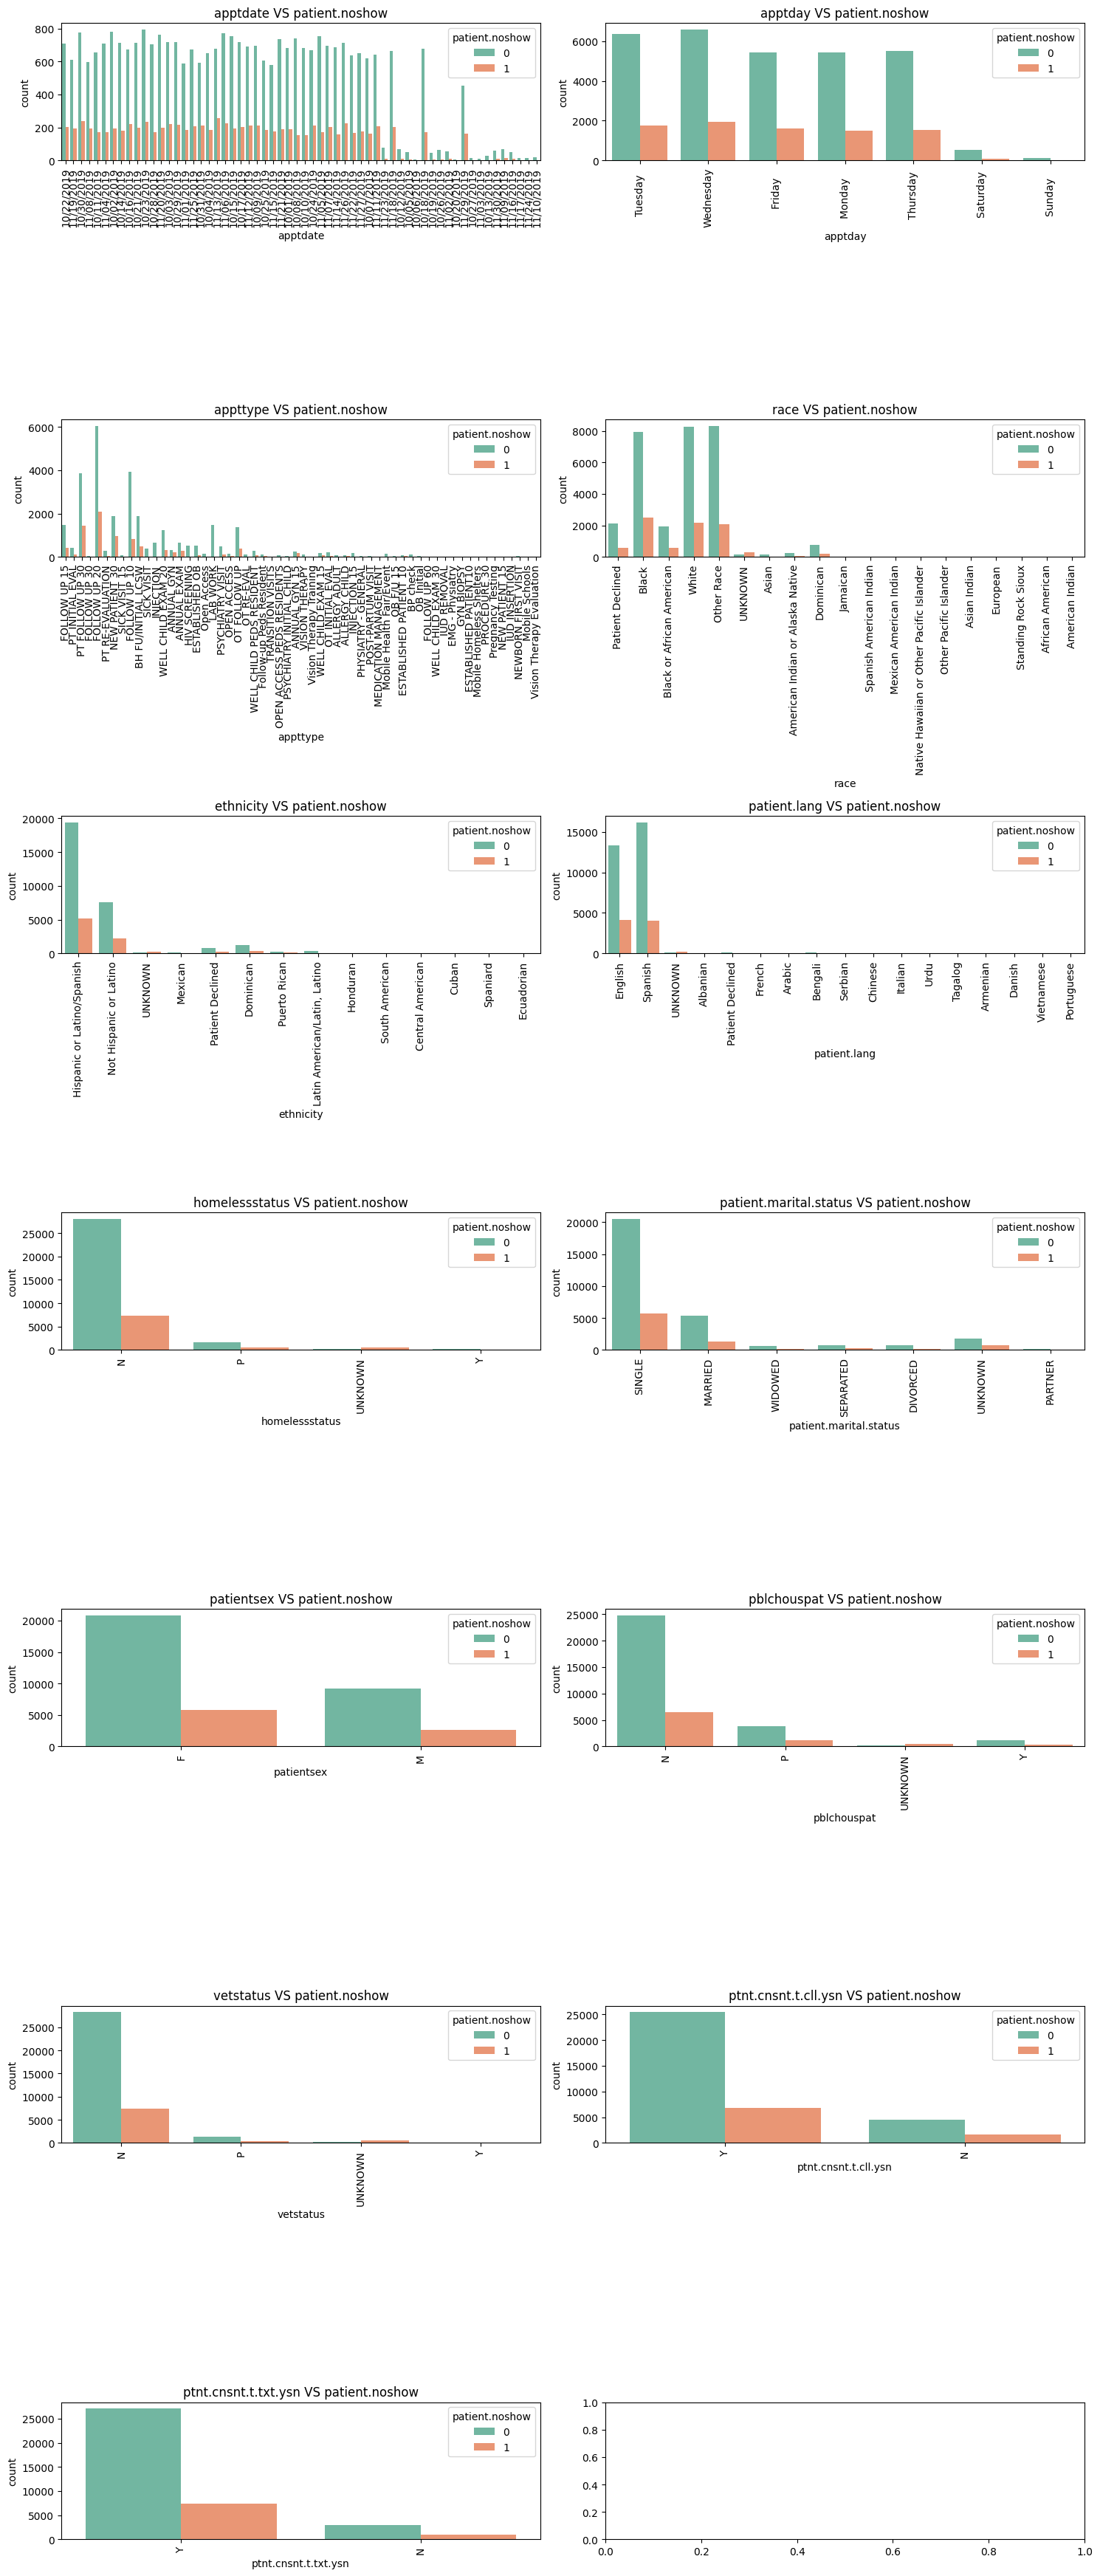

In [30]:
plot_bivaraite_cat(data , 'patient.noshow' , cat_cols)

#### DATA PROCESSING

In [31]:
appt_type_mapping = {
    # Annual
    'ANNUAL EXAM': 'Annual',

    # Follow Up (includes Established Patient 10 variants and follow-up variants)
    'FOLLOW UP 15': 'Follow Up',
    'FOLLOW UP 30': 'Follow Up',
    'FOLLOW UP 20': 'Follow Up',
    'FOLLOW UP 10': 'Follow Up',
    'FOLLOW UP 60': 'Follow Up',
    'ESTABLISHED PATIENT 10': 'Follow Up',
    'ESTABLISHED PATIENT10': 'Follow Up',

    # GYN
    'ANNUAL GYN': 'GYN',
    'ANNUAL GYN 15': 'GYN',
    'ESTABLISHED OB': 'GYN',
    'GYN BIOPSY': 'GYN',
    'HIV SCREENING': 'GYN',
    'NEWBORN FIRST VISIT': 'GYN',
    'OB F/U 15': 'GYN',
    'OB INITIAL': 'GYN',
    'POST-PARTUM VISIT': 'GYN',
    'PREGNANCY TESTING': 'GYN',
    'IUD INSERTION': 'GYN',
    'IUD REMOVAL': 'GYN',

    # New Patient
    'NEW PATIENT 30': 'New Patient',
    'NEW PATIENT 15': 'New Patient',

    # OT
    'OT FOLLOW UP': 'OT',
    'OT INITIAL EVAL': 'OT',
    'OT RE-EVAL': 'OT',

    # Other
    'ALLERGY ADULT': 'Other',
    'INJECTION': 'Other',
    'INJECTION 15': 'Other',
    'LAB WORK': 'Other',
    'MOBILE HEALTH FAIR/EVENT': 'Other',
    'MOBILE HOMELESS SHELTERS': 'Other',
    'MOBILE SCHOOLS': 'Other',
    'PROCEDURE 30': 'Other',
    'SICK VISIT': 'Other',
    'SICK VISIT 15': 'Other',
    'VISION THERAPY': 'Other',
    'VISION THERAPY TRAINING': 'Other',
    'VISION THERAPY EVALUATION': 'Other',
    'BH FU/INITIAL LCSW': 'Other',
    'BP CHECK': 'Other',
    'MEDICATION MANAGEMENT': 'Other',
    'OPEN ACCESS': 'Other',
    'TRANSITION VISITS': 'Other',

    # Pediatrics
    'WELL CHILD EXAM 20': 'Pediatrics',
    'WELL CHILD EXAM 15': 'Pediatrics',
    'WELL CHILD EXAM 30': 'Pediatrics',
    'WELL CHILD PEDS RESIDENT': 'Pediatrics',
    'FOLLOW-UP PEDS RESIDENT': 'Pediatrics',
    'ALLERGY CHILD': 'Pediatrics',
    'OPEN ACCESS PEDS RESIDENTS': 'Pediatrics',

    # Psychiatry
    'PSYCHIATRY VISIT': 'Psychiatry',
    'PSYCHIATRY INITIAL CHILD': 'Psychiatry',

    # PT
    'PT INITIAL EVAL': 'PT',
    'PT FOLLOW UP 30': 'PT',
    'PT RE-EVALUATION': 'PT',
    'EMG - PHYSIATRY': 'PT',
    'PHYSIATRY - GENERAL': 'PT'
}

# Convert the appttype column to uppercase (and strip whitespace) for consistent mapping
df['appttype_clean'] = df['appttype'].str.strip().str.upper()

# Map the appointment types to the desired categories
df['Appointment Group'] = df['appttype_clean'].map(appt_type_mapping)

# Check the result
print(df[['appttype', 'Appointment Group']].head(20))

# Check the result
#print(df['appttype'].unique())

#print(filtered_df[['appttype', 'Appointment Group']].head())

df = df.drop(columns=['appttype_clean','appttype'])
print(df['Appointment Group'].unique())



            appttype Appointment Group
0       FOLLOW UP 15         Follow Up
1       FOLLOW UP 15         Follow Up
2    PT INITIAL EVAL                PT
3    PT FOLLOW UP 30                PT
4       FOLLOW UP 30         Follow Up
5       FOLLOW UP 20         Follow Up
6   PT RE-EVALUATION                PT
7    PT FOLLOW UP 30                PT
8    PT FOLLOW UP 30                PT
9    PT FOLLOW UP 30                PT
10   PT FOLLOW UP 30                PT
11   PT FOLLOW UP 30                PT
12   PT FOLLOW UP 30                PT
13      FOLLOW UP 15         Follow Up
14      FOLLOW UP 20         Follow Up
15      FOLLOW UP 20         Follow Up
16    NEW PATIENT 30       New Patient
17     SICK VISIT 15             Other
18      FOLLOW UP 10         Follow Up
19      FOLLOW UP 20         Follow Up
['Follow Up' 'PT' 'New Patient' 'Other' 'Pediatrics' 'GYN' 'Annual'
 'Psychiatry' 'OT']


In [32]:
df = df.drop(columns=['apptdate'])


In [33]:
df.head(2)

,apptday,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn,age_group,Appointment Group
0,Tuesday,1,1,0,Patient Declined,Hispanic or Latino/Spanish,English,F,SINGLE,N,N,N,Y,Y,51-60,Follow Up
1,Tuesday,1,0,0,Patient Declined,Hispanic or Latino/Spanish,English,F,SINGLE,N,N,N,Y,Y,51-60,Follow Up


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38393 entries, 0 to 38609
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   apptday                 38393 non-null  object  
 1   scheduled.slots         38393 non-null  int64   
 2   cancelled.slots         38393 non-null  int64   
 3   patient.noshow          38393 non-null  int64   
 4   race                    38393 non-null  object  
 5   ethnicity               38393 non-null  object  
 6   patient.lang            38393 non-null  object  
 7   patientsex              38393 non-null  object  
 8   patient.marital.status  38393 non-null  object  
 9   homelessstatus          38393 non-null  object  
 10  pblchouspat             38393 non-null  object  
 11  vetstatus               38393 non-null  object  
 12  ptnt.cnsnt.t.cll.ysn    38393 non-null  object  
 13  ptnt.cnsnt.t.txt.ysn    38393 non-null  object  
 14  age_group               383

In [35]:
cat_cols = ['apptday','age_group','Appointment Group',
    'race', 'ethnicity','patient.lang','homelessstatus','patient.marital.status',
	'patientsex','pblchouspat','vetstatus','ptnt.cnsnt.t.cll.ysn','ptnt.cnsnt.t.txt.ysn']

num_cols = ['scheduled.slots', 'cancelled.slots', 'patient.noshow']

In [36]:
##### Label encoding
from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}
    

In [38]:
mappings

{'apptday': {'Friday   ': np.int64(0),
  'Monday   ': np.int64(1),
  'Saturday ': np.int64(2),
  'Sunday   ': np.int64(3),
  'Thursday ': np.int64(4),
  'Tuesday  ': np.int64(5),
  'Wednesday': np.int64(6)},
 'age_group': {'0-10': np.int64(0),
  '11-20': np.int64(1),
  '21-30': np.int64(2),
  '31-40': np.int64(3),
  '41-50': np.int64(4),
  '51-60': np.int64(5),
  '61-70': np.int64(6),
  '71-80': np.int64(7),
  '81-90': np.int64(8),
  '91+': np.int64(9)},
 'Appointment Group': {'Annual': np.int64(0),
  'Follow Up': np.int64(1),
  'GYN': np.int64(2),
  'New Patient': np.int64(3),
  'OT': np.int64(4),
  'Other': np.int64(5),
  'PT': np.int64(6),
  'Pediatrics': np.int64(7),
  'Psychiatry': np.int64(8)},
 'race': {'African American': np.int64(0),
  'American Indian': np.int64(1),
  'American Indian or Alaska Native': np.int64(2),
  'Asian': np.int64(3),
  'Asian Indian': np.int64(4),
  'Black': np.int64(5),
  'Black or African American': np.int64(6),
  'Dominican': np.int64(7),
  'European

In [39]:
df.head()

,apptday,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn,age_group,Appointment Group
0,5,1,1,0,14,4,6,0,4,0,0,0,1,1,5,1
1,5,1,0,0,14,4,6,0,4,0,0,0,1,1,5,1
2,6,0,0,0,5,8,6,1,4,0,0,0,0,1,8,6
3,0,1,1,0,5,8,6,1,4,0,0,0,0,1,8,6
4,0,1,0,0,5,8,6,0,4,1,1,1,1,0,4,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38393 entries, 0 to 38609
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   apptday                 38393 non-null  int64
 1   scheduled.slots         38393 non-null  int64
 2   cancelled.slots         38393 non-null  int64
 3   patient.noshow          38393 non-null  int64
 4   race                    38393 non-null  int64
 5   ethnicity               38393 non-null  int64
 6   patient.lang            38393 non-null  int64
 7   patientsex              38393 non-null  int64
 8   patient.marital.status  38393 non-null  int64
 9   homelessstatus          38393 non-null  int64
 10  pblchouspat             38393 non-null  int64
 11  vetstatus               38393 non-null  int64
 12  ptnt.cnsnt.t.cll.ysn    38393 non-null  int64
 13  ptnt.cnsnt.t.txt.ysn    38393 non-null  int64
 14  age_group               38393 non-null  int64
 15  Appointment Group       

### Multicollinearity

In [ ]:
#!pip install statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [44]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [45]:
vif_data

,feature,VIF
0,const,77.583099
1,apptday,1.001665
2,scheduled.slots,1.184534
3,cancelled.slots,1.783357
4,patient.noshow,1.574909
5,race,1.096651
6,ethnicity,1.330472
7,patient.lang,1.289186
8,patientsex,1.039483
9,patient.marital.status,1.083389


#### Our data dont have any multicollinearity

In [46]:
corr = df.corr()

In [47]:
corr

,apptday,scheduled.slots,cancelled.slots,patient.noshow,race,ethnicity,patient.lang,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn,age_group,Appointment Group
apptday,1.000000,0.013731,0.009195,0.003985,0.001357,-0.011364,0.002629,-0.009870,-0.009734,-0.003022,0.000546,0.001207,-0.013446,-0.003293,0.033026,-0.011313
scheduled.slots,0.013731,1.000000,0.387030,0.181155,0.003129,0.017306,-0.017516,-0.017395,0.010530,0.031487,0.013178,0.035565,0.016163,0.009610,-0.028448,-0.021343
cancelled.slots,0.009195,0.387030,1.000000,0.597248,-0.009779,0.054648,-0.029532,-0.018465,0.029518,0.105082,0.055190,0.109199,-0.047665,-0.029848,-0.002331,-0.023320
patient.noshow,0.003985,0.181155,0.597248,1.000000,-0.013099,0.048591,-0.027902,-0.000681,0.030178,0.122247,0.060054,0.121349,-0.053273,-0.035447,-0.004078,-0.036898
race,0.001357,0.003129,-0.009779,-0.013099,1.000000,-0.239105,0.223071,-0.047318,-0.042272,-0.004793,0.008984,0.028337,0.079498,-0.003536,0.057707,-0.028848
ethnicity,-0.011364,0.017306,0.054648,0.048591,-0.239105,1.000000,-0.432642,0.056171,0.064808,0.171437,0.077523,0.181618,-0.035640,-0.023342,-0.036590,0.013369
patient.lang,0.002629,-0.017516,-0.029532,-0.027902,0.223071,-0.432642,1.000000,-0.043155,-0.083200,-0.007880,0.016530,-0.013533,0.073767,-0.004362,0.113661,-0.028665
patientsex,-0.009870,-0.017395,-0.018465,-0.000681,-0.047318,0.056171,-0.043155,1.000000,0.040181,0.028891,-0.022234,0.028545,-0.004571,-0.001813,-0.169354,0.067469
patient.marital.status,-0.009734,0.010530,0.029518,0.030178,-0.042272,0.064808,-0.083200,0.040181,1.000000,0.067942,0.004538,0.058031,-0.022376,0.004171,-0.243640,0.089398
homelessstatus,-0.003022,0.031487,0.105082,0.122247,-0.004793,0.171437,-0.007880,0.028891,0.067942,1.000000,0.373412,0.710657,-0.156072,-0.113983,0.005271,0.018885


<Axes: >

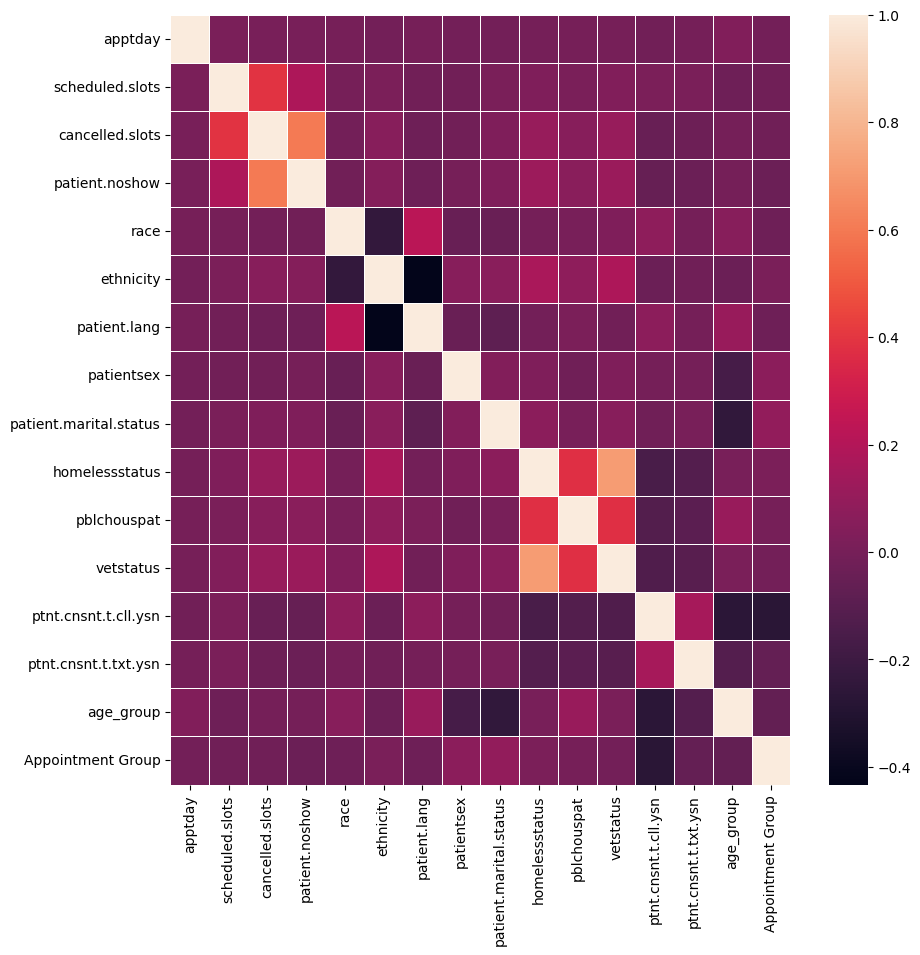

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , linewidths=0.5)

In [49]:
#### Skewness

In [50]:
skewness  = df.skew()

In [51]:
skewness

apptday                  -0.334958
scheduled.slots          -1.378877
cancelled.slots           0.612405
patient.noshow            1.357129
race                     -0.160024
ethnicity                 0.934525
patient.lang             -0.175610
patientsex                0.838304
patient.marital.status   -1.136085
homelessstatus            4.285724
pblchouspat               2.770712
vetstatus                 4.529029
ptnt.cnsnt.t.cll.ysn     -1.838605
ptnt.cnsnt.t.txt.ysn     -2.608814
age_group                -0.048264
Appointment Group         0.277983
dtype: float64

In [52]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [53]:
#### Imablanced Data

In [54]:
df["patient.noshow"].value_counts()

patient.noshow
0    29975
1     8418
Name: count, dtype: int64

In [55]:
X = df.drop(columns='patient.noshow')
y = df["patient.noshow"]

In [56]:
X.columns

Index(['apptday', 'scheduled.slots', 'cancelled.slots', 'race', 'ethnicity',
       'patient.lang', 'patientsex', 'patient.marital.status',
       'homelessstatus', 'pblchouspat', 'vetstatus', 'ptnt.cnsnt.t.cll.ysn',
       'ptnt.cnsnt.t.txt.ysn', 'age_group', 'Appointment Group'],
      dtype='object')

In [58]:
y.value_counts()

patient.noshow
0    29975
1     8418
Name: count, dtype: int64

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X,y)

In [61]:
y_res

0        0
1        0
2        0
3        0
4        0
        ..
59945    1
59946    1
59947    1
59948    1
59949    1
Name: patient.noshow, Length: 59950, dtype: int64

In [62]:
y_res.value_counts()

patient.noshow
0    29975
1    29975
Name: count, dtype: int64

In [99]:
balanced_df = pd.DataFrame(X_res , columns=X.columns)
balanced_df["patient.noshow"] = y_res

In [100]:
balanced_df.head()

,apptday,scheduled.slots,cancelled.slots,race,ethnicity,patient.lang,patientsex,patient.marital.status,homelessstatus,pblchouspat,vetstatus,ptnt.cnsnt.t.cll.ysn,ptnt.cnsnt.t.txt.ysn,age_group,Appointment Group,patient.noshow
0,5,1,1,14,4,6,0,4,0,0,0,1,1,5,1,0
1,5,1,0,14,4,6,0,4,0,0,0,1,1,5,1,0
2,6,0,0,5,8,6,1,4,0,0,0,0,1,8,6,0
3,0,1,1,5,8,6,1,4,0,0,0,0,1,8,6,0
4,0,1,0,5,8,6,0,4,1,1,1,1,0,4,1,0


In [101]:
balanced_df.shape

(59950, 16)

In [102]:
df = balanced_df.copy()

In [103]:
df.shape

(59950, 16)

#### Feature Selection

In [105]:
len(df.columns)

16

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [108]:
feature_importance = model.feature_importances_

In [109]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [110]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [111]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["patient.noshow"]]

In [112]:
top_10_df.head()

,cancelled.slots,age_group,apptday,Appointment Group,race,scheduled.slots,patient.marital.status,ethnicity,patient.lang,pblchouspat,patient.noshow
0,1,5,5,1,14,1,4,4,6,0,0
1,0,5,5,1,14,1,4,4,6,0,0
2,0,8,6,6,5,0,4,8,6,0,0
3,1,8,0,6,5,1,4,8,6,0,0
4,0,4,0,1,5,1,4,8,6,1,0


In [113]:
len(top_10_df.columns)

11

In [114]:
df = top_10_df.copy()

### MODEL SELECTION

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [117]:
X = df.drop(columns='patient.noshow')
y = df["patient.noshow"]

In [147]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [148]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [149]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [150]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, average = None)
    recall = recall_score(y_test,y_pred, average = None)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 23917, number of negative: 24043
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 47960, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498686 -> initscore=-0.005254
[LightGBM] [Info] Start training from score -0.005254


In [151]:
metrics_df= pd.DataFrame(metrics)

In [152]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.875313,"[0.9354268891069676, 0.830891950688905]","[0.8034389750505732, 0.9456916474083856]",0.884583
1,LogisticRegression,0.866806,"[1.0, 0.7913781841933377]","[0.730782198246797, 1.0]",0.883541
2,Gradient Boosting,0.867807,"[0.9954410759060862, 0.7941601999210838]","[0.7361766689143627, 0.9966985803895675]",0.883976
3,Suuport vector classifier,0.866806,"[1.0, 0.7913781841933377]","[0.730782198246797, 1.0]",0.883541
4,Decsion Tree,0.865388,"[0.899518874907476, 0.8373823261463711]","[0.819453809844909, 0.910366457576758]",0.872351
5,KNN,0.844954,"[0.9068931068931069, 0.800572655690766]","[0.7651719487525287, 0.9230769230769231]",0.857471
6,Naive Bayes,0.861468,"[0.9757184228113166, 0.7930942540994534]","[0.7383681726230613, 0.9820072631231429]",0.877498
7,XGboost,0.872143,"[0.9739280327515621, 0.8078650156483875]","[0.7619689817936615, 0.9800264113568835]",0.885657
8,Adaboost,0.866806,"[1.0, 0.7913781841933377]","[0.730782198246797, 1.0]",0.883541
9,LGBM,0.872227,"[0.990414623272403, 0.8015724946695096]","[0.7489885367498315, 0.9929019478375701]",0.887037


##### TRAIN OUR RF MODEL

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [125]:
X = df.drop(columns='patient.noshow')
y = df["patient.noshow"]

In [153]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [154]:
rf = RandomForestClassifier(random_state=42)

In [155]:
params_dist={
    'n_estimators' : randint(50,200),
    'max_depth' : randint(3,10),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

In [156]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [157]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time=   1.0s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time=   1.1s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time=   1.0s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time=   1.0s
[CV] END bootstrap=True, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=156; total time=   1.0s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=171; total time=   1.4s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=171; total time=   1.4s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=8, n_estimators=171; total time=   1.5s
[CV] END 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x138b4c2f0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x138b68fb0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x138b684a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x138b68ec0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [158]:
random_search.best_params_

{'bootstrap': True,
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 137}

In [159]:
best_rf_model = random_search.best_estimator_

In [160]:
y_pred = best_rf_model.predict(X_test)

In [161]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [162]:
accuracy

0.868557130942452

In [163]:
precision

0.794558359621451

In [164]:
recall

0.9978540772532188

In [165]:
f1

0.8846773013317722

### Save this model

In [139]:
import joblib

In [140]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [141]:
loaded_model=joblib.load("random_forest.pkl")

In [142]:
X_train[0:1]

,cancelled.slots,age_group,apptday,Appointment Group,race,scheduled.slots,patient.marital.status,ethnicity,patient.lang,pblchouspat
41600,1,5,1,0,14,1,4,4,12,0


In [143]:
new_data = np.array([1	,5,	1	,0,	14,	1,	4	,4	,12,	0]).reshape(1,-1)

In [144]:
predictions=loaded_model.predict(new_data)

In [145]:
predictions

array([1])